In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [2]:
airbnb = pd.read_csv('listings.csv')
airbnb.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,2.020000e+13,1/4/2016,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,2.020000e+13,1/4/2016,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,2.020000e+13,1/4/2016,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,2.020000e+13,1/4/2016,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,2.020000e+13,1/4/2016,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [3]:
print("Data type : ", type(airbnb))
print("Data dims : ", airbnb.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (3818, 92)


In [4]:
print(airbnb.dtypes)

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
summary                              object
space                                object
description                          object
experiences_offered                  object
neighborhood_overview                object
notes                                object
transit                              object
thumbnail_url                        object
medium_url                           object
picture_url                          object
xl_picture_url                       object
host_id                               int64
host_url                             object
host_name                            object
host_since                           object
host_location                        object
host_about                           object
host_response_time              

In [4]:
roomsnbeds = pd.DataFrame(airbnb[["name", "bathrooms", "bedrooms", "beds", "review_scores_rating", "price"]])
roomsnbeds["price"] = roomsnbeds["price"].apply(lambda x: x.replace('$',''))
roomsnbeds["price"] = roomsnbeds["price"].apply(lambda x: x.replace(',',''))
roomsnbeds["price"] = roomsnbeds["price"].apply(lambda x: x.replace('.',''))
roomsnbeds.head()

,name,bathrooms,bedrooms,beds,review_scores_rating,price
0,Stylish Queen Anne Apartment,1.0,1.0,1.0,95.0,8500
1,Bright & Airy Queen Anne Apartment,1.0,1.0,1.0,96.0,15000
2,New Modern House-Amazing water view,4.5,5.0,7.0,97.0,97500
3,Queen Anne Chateau,1.0,0.0,2.0,NaN,10000
4,Charming craftsman 3 bdm house,2.0,3.0,3.0,92.0,45000


In [28]:
roomsnbeds['price'] = roomsnbeds['price'].astype(str).astype(float)
roomsnbeds['bathrooms'] = roomsnbeds['bathrooms'].fillna(0.0).astype(int)
roomsnbeds['bathrooms'] = roomsnbeds['bathrooms'].fillna(0.0).astype('category')
roomsnbeds['bedrooms'] = roomsnbeds['bedrooms'].fillna(0.0).astype(int)
roomsnbeds['bedrooms'] = roomsnbeds['bedrooms'].fillna(0.0).astype('category')
roomsnbeds['beds'] = roomsnbeds['beds'].fillna(0.0).astype(int)
roomsnbeds['beds'] = roomsnbeds['beds'].fillna(0.0).astype('category')
print(roomsnbeds.dtypes)

name                      object
bathrooms               category
bedrooms                category
beds                    category
review_scores_rating     float64
price                    float64
dtype: object


In [29]:
roomsnbeds["price"] = roomsnbeds["price"]/100
roomsnbeds.head()

,name,bathrooms,bedrooms,beds,review_scores_rating,price
0,Stylish Queen Anne Apartment,1,1,1,95.0,0.0085
1,Bright & Airy Queen Anne Apartment,1,1,1,96.0,0.0150
2,New Modern House-Amazing water view,4,4,4,97.0,0.0975
3,Queen Anne Chateau,1,1,1,NaN,0.0100
4,Charming craftsman 3 bdm house,2,2,2,92.0,0.0450


1    3130
2     497
3     121
0      55
4      11
8       2
5       2
Name: bathrooms, dtype: int64


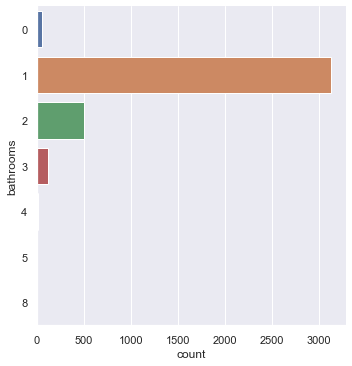

In [30]:
print(roomsnbeds["bathrooms"].value_counts())
sb.catplot(y = "bathrooms", data = roomsnbeds, kind = "count")

1    3130
2     497
3     121
0      55
4      11
8       2
5       2
Name: bedrooms, dtype: int64


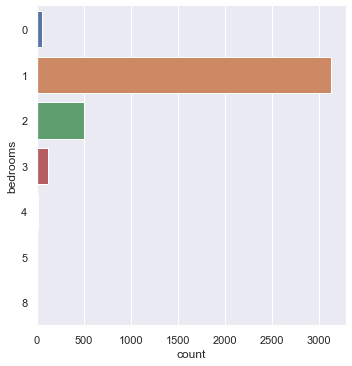

In [31]:
print(roomsnbeds["bedrooms"].value_counts())
sb.catplot(y = "bedrooms", data = roomsnbeds, kind = "count")

1    3130
2     497
3     121
0      55
4      11
5       2
8       2
Name: beds, dtype: int64


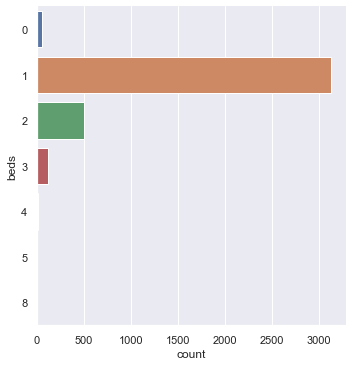

In [25]:
print(roomsnbeds["beds"].value_counts())
sb.catplot(y = "beds", data = roomsnbeds, kind = "count")

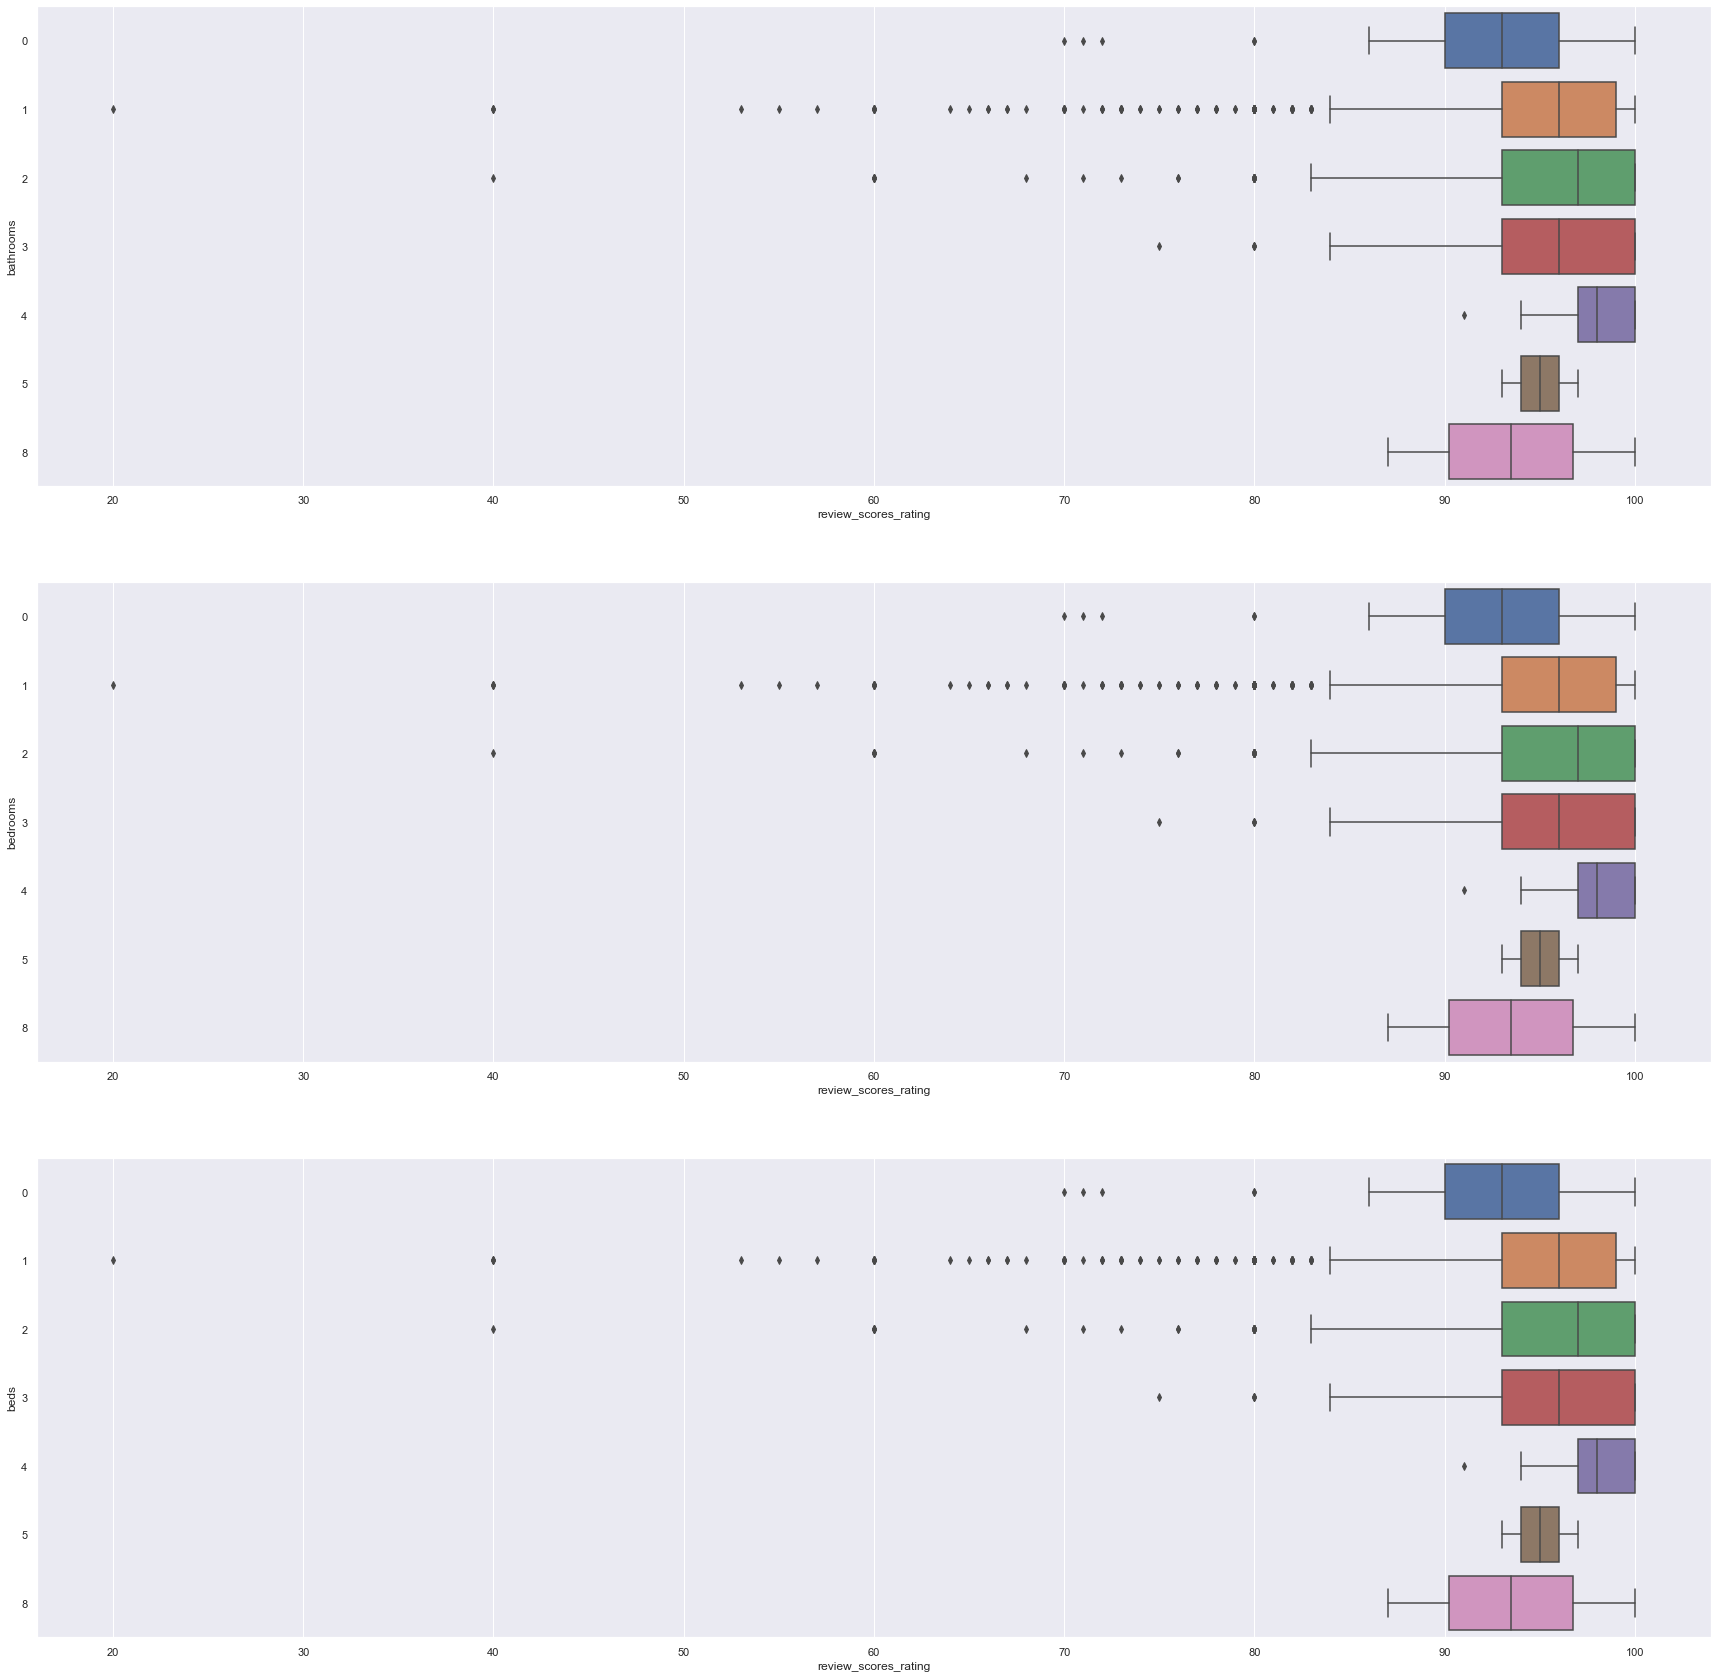

In [38]:
f, axes = plt.subplots(3, 1, figsize=(30,30))
sb.boxplot(y = 'bathrooms', x =  'review_scores_rating', data = roomsnbeds, ax = axes[0])
sb.boxplot(y = 'bedrooms', x = 'review_scores_rating', data = roomsnbeds, ax = axes[1])
sb.boxplot(y = 'beds', x =  'review_scores_rating', data = roomsnbeds, ax = axes[2])

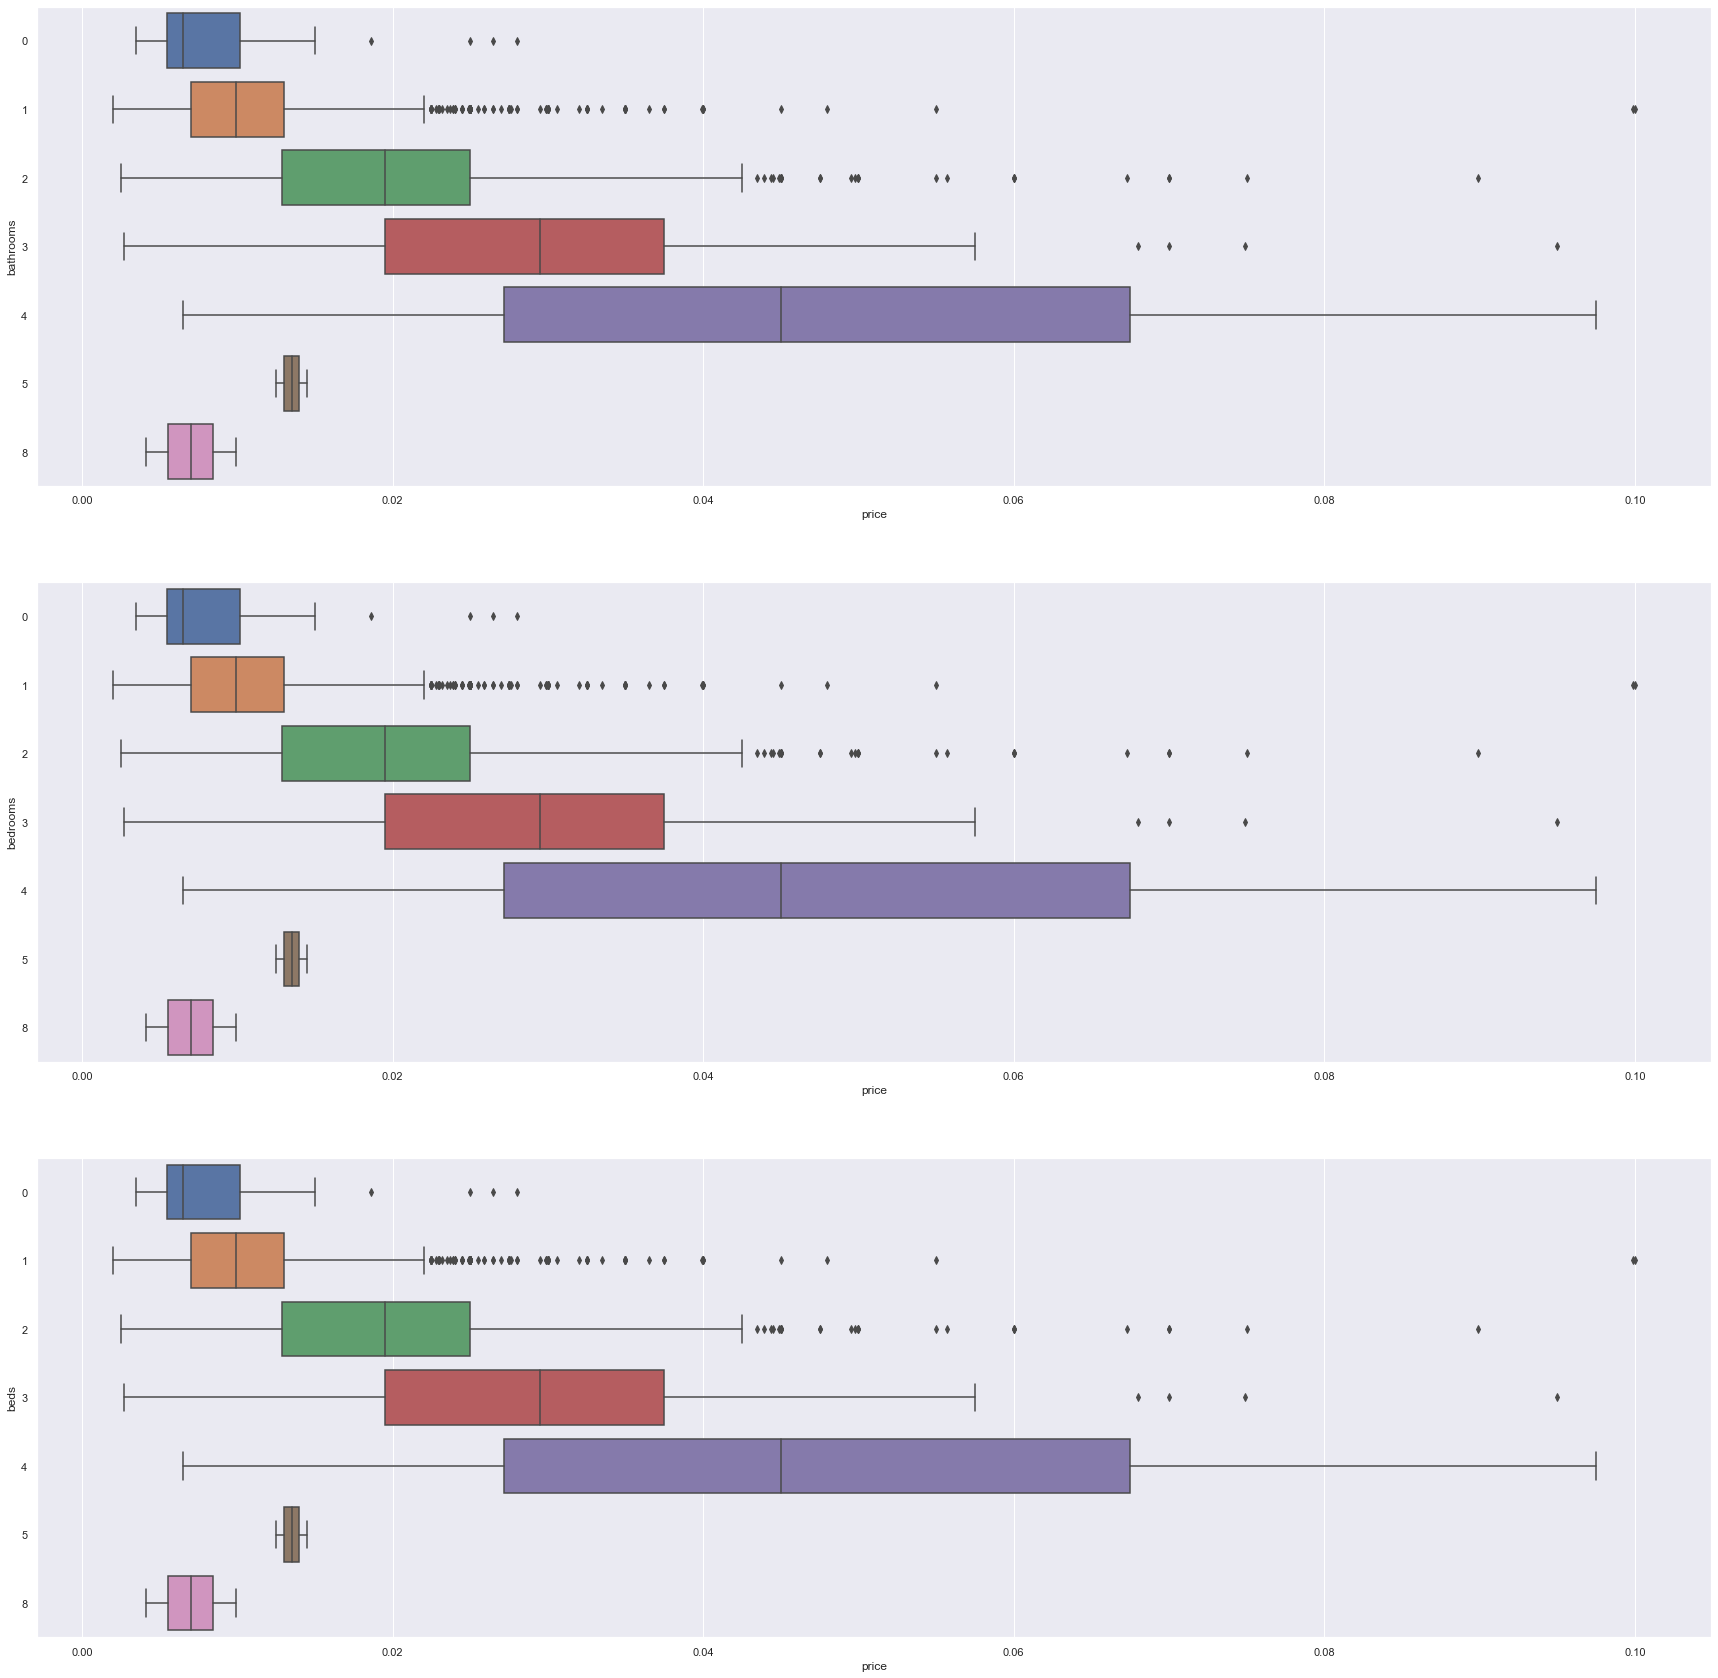

In [39]:
f, axes = plt.subplots(3, 1, figsize=(30,30))
sb.boxplot(y = 'bathrooms', x =  'price', data = roomsnbeds, ax = axes[0])
sb.boxplot(y = 'bedrooms', x = 'price', data = roomsnbeds, ax = axes[1])
sb.boxplot(y = 'beds', x =  'price', data = roomsnbeds, ax = axes[2])